# Monte Carlo Simulations as a Decision Making Tool

- Multiple probability simulation
- Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models (Ref: https://www.investopedia.com/terms/m/montecarlosimulation.asp)
- Observing different realizations of a future event (Scenario1, Scenario2, ScenarioX)

- We calculate future data's mean and variance values 
- A larger data set with fictional data 
- Good proxy of different outcomes
- Used for many purposes: pricing, risk, etc.


## Monte Carlo in Corporate Finance 

- currentRevenues = lastYearRevenues * (1 + growthRateOfRevenues)
  - In this formula, lastYearRevenue is availavle
  - Variable is growthRateOfRevenues 
  - -> We can run 1,000 simulations of growthRateOfRevenues
  - -> Then get the idea of "Average", "Maximum" and "Minimum" values

- Example: For corporate finance, monte carlo can allow us to forecast:
  - Revenues, Cogs and Operating Profit
  

In [27]:
# Goal: Predict the firm's future gross profit
# Requirements:
#   Expected revenue
#   Expected COGS (Cost of Goods Sold)
# Solution:
#   Perform 1,000 simulations of the company's expected revenues


import numpy as np
import matplotlib.pyplot as plt

# values are in million $ (x1000,000)
rev_m = 170     # revenue mean. expected revenue for this year
rev_stdev = 20  # standard deviation of the expected revenue of this year

iterations = 1000 # number of simulations 


In [28]:
# future of revenues 
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev 

array([188.9315136 , 187.44589327, 181.44906032, 146.1683134 ,
       213.91233451, 162.49805013, 186.16050132, 191.07578312,
       193.57981781, 172.38643345, 171.96429259, 181.20865163,
       196.3033715 , 159.25049479, 158.67574571, 196.53208226,
       169.62271365, 152.4939813 , 159.67301554, 171.61759375,
       189.76723864, 176.42398236, 147.42926801, 143.56085103,
       150.51700044, 193.2062208 , 174.309502  , 181.84949482,
       188.06350133, 180.20799025, 222.53475422, 182.41491585,
       189.31751307, 169.43331662, 152.61387531, 150.02126857,
       173.14587007, 172.85376238, 165.68781076, 164.27409136,
       185.32190338, 189.23989198, 152.88996928, 175.98050614,
       168.31500109, 188.71401796, 163.13176616, 168.56673737,
       176.75039221, 157.12656367, 151.54519481, 181.3987364 ,
       166.43976448, 172.87062213, 192.77316085, 170.86668405,
       173.4639362 , 149.88340258, 140.58860307, 169.84909694,
       185.86885565, 193.92621048, 166.06525969, 160.70

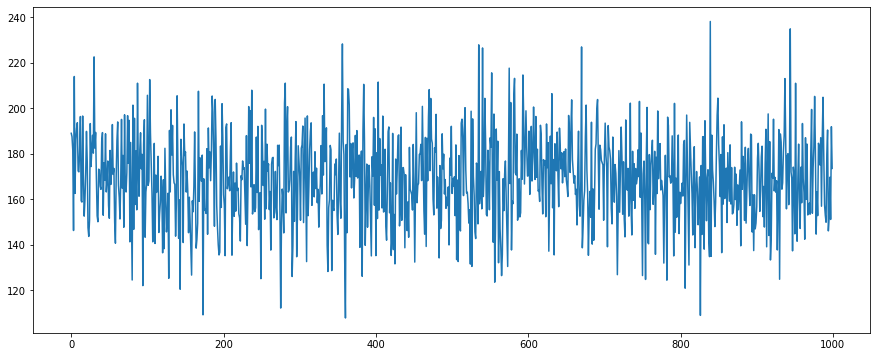

In [29]:
# check the distributions
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()

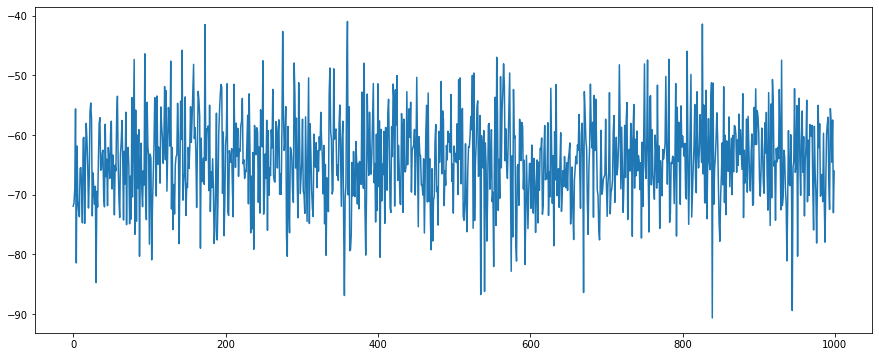

In [30]:
# Estimated percentage of COGS : ~60% of the revenues 
# also, standart deviation is selected 0.1
COGS = - (rev * np.random.normal(0.6, 0.1)) # - because COGS is money spent
plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [31]:
COGS.mean() # naturally we will get a different value everytime if we re-run above

-64.29055521624824

In [32]:
COGS.std() 

7.490452856671082

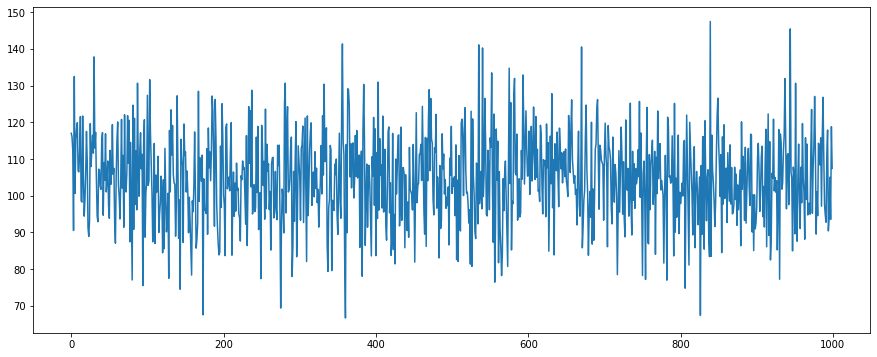

In [33]:
GrossProfit = rev + COGS

plt.figure(figsize=(15,6))
plt.plot(GrossProfit)
plt.show()

In [35]:
print ("Max Gross Profit: %f" % max(GrossProfit))
print ("Min Gross Profit: %f" % min(GrossProfit))
print ("Mean Gross Profit: %f" % GrossProfit.mean())
print ("Standard Deviation: %f" % GrossProfit.std())

Max Gross Profit: 147.471900
Min Gross Profit: 66.698723
Mean Gross Profit: 104.593541
Standard Deviation: 12.186129


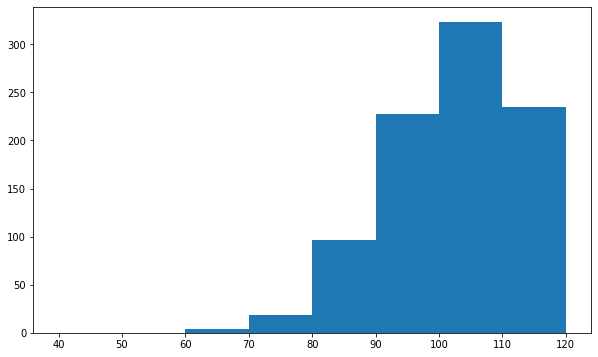

In [36]:
# show the distribution of output using histogram
plt.figure(figsize=(10,6))
# here we are specifying the bins
plt.hist(GrossProfit, bins = [40, 50, 60, 70, 80, 90, 100,110, 120])
plt.show()


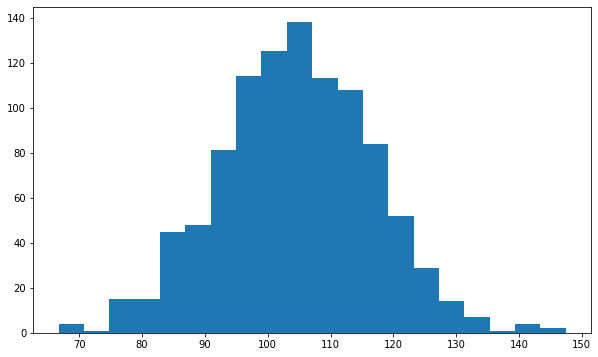

In [37]:
# OR 
plt.figure(figsize=(10,6))
plt.hist(GrossProfit, bins = 20) # we are asking to have 20 bins
plt.show()

## Forecasting Stock Prices with Monte Carlo Simulation

- $priceToday = priceYesterday * e^r$
  - r : log return of share price between yesterday and today
    - $ln(priceToday/priceYesterday)$
 
- Check this for more details: https://towardsdatascience.com/stock-price-prediction-intervals-using-monte-carlo-simulation-6b52b8ac9c27 



In [41]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm 
%matplotlib inline


In [42]:
ticker = 'MSFT'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']


In [44]:
# pandas.pct_change() : obtains simple returns from a provided dataset
logReturns = np.log(1 + data.pct_change())
logReturns.tail()

,MSFT
Date,
2020-07-30,-0.000784
2020-07-31,0.005429
2020-08-03,0.054717
2020-08-04,-0.015123
2020-08-05,-0.001642


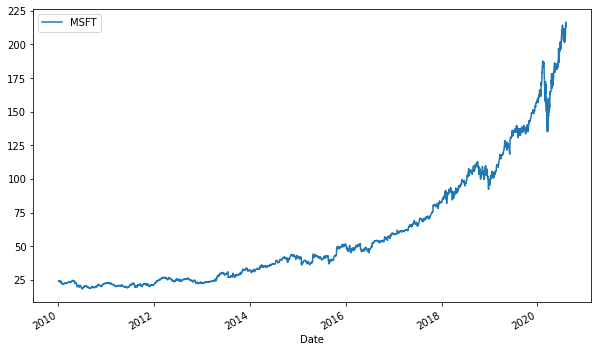

In [47]:
data.plot(figsize=(10,6))

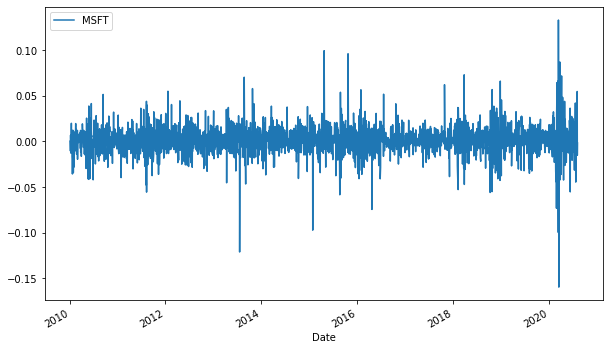

In [48]:
logReturns.plot(figsize=(10,6))

In [49]:
u = logReturns.mean() 
var = logReturns.var()

print('Mean: %f' % u)
print('Variance: %f' % var)

Mean: 0.000816
Variance: 0.000252


Drift: Best approximation of future rates of return of the stock
$$
drift = u - \frac{1}{2} . var
$$

- u : average log return
- var : variance

In [50]:
# we won't annualize, we will predict MSFT's daily stock price
drift = u - (0.5 * var)
print('Drift : %f' % drift)

Drift : 0.000689


In [51]:
stdev = logReturns.std()
print ('Standard Deviation: %f' % stdev)

Standard Deviation: 0.015882


Brownian motion
 - Brownian motion is a widely used mathematical model for asset prices with the assumption of their constant volatilities (Ref: https://www.sciencedirect.com/topics/engineering/geometric-brownian-motion )
 
 - It is technically a Markov process. This means the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH)—past price information is already incorporated, and the next price movement is "conditionally independent" of past price movements (Ref: https://www.investopedia.com/articles/07/montecarlo.asp)

$$
r = drift + stdev * e^r
$$

In [55]:
# type should be panda series (pandas.core.series.Series)
print("drift's type: %s" % type(drift))
print("stdev's type: %s" % type(stdev))

drift's type: <class 'pandas.core.series.Series'>
stdev's type: <class 'pandas.core.series.Series'>


In [59]:
# Convert to numpy arrays
np.array(drift) # we can use numpy.array 
stdev.values # or we can just use .values this will convert the object to numpy array

array([0.01588214])

In [70]:
# z corresponds to the distance between the mean and 
#    the events, expressed as the number of standard deviations
# norm.pppf is part of scipy.stats.. 
#    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html 

z = norm.ppf(np.random.rand(10,2))
z 

array([[-0.56154378, -0.60777729],
       [ 0.53286815,  0.04264694],
       [-0.85344781,  1.44053041],
       [ 1.38226614,  1.65831657],
       [-0.53158089,  0.92660342],
       [-0.50844456, -0.71328884],
       [ 1.07917824, -0.56792858],
       [ 0.03267676,  0.60769784],
       [-0.14271013, -0.2961435 ],
       [ 0.9265967 ,  0.68889068]])

In [71]:
timeIntervals = 1000# like 1000 days
iterations = 10

$$
dailyReturns = e^r
$$
$$
r = drift + stdev.z 
$$

numpy.exp() : Calculates $e^{expression}$


In [73]:
dailyReturns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(timeIntervals, iterations)))
dailyReturns

array([[1.00876373, 1.0032591 , 1.01554763, ..., 1.0063726 , 0.9942286 ,
        0.99290213],
       [0.99282902, 1.01247004, 0.99778146, ..., 1.00514342, 1.01926993,
        0.98239494],
       [1.02336522, 1.03740973, 0.99867368, ..., 0.99838853, 1.01092666,
        1.00557452],
       ...,
       [0.98798839, 0.99693892, 0.99536048, ..., 0.99616988, 0.98893855,
        1.00008808],
       [1.01275928, 1.03577327, 0.99005027, ..., 0.9873699 , 0.97200136,
        0.9953205 ],
       [0.98573213, 0.97761906, 0.98643419, ..., 0.97447776, 1.00870386,
        1.01929029]])

Create a price list for 1k days

$S_t = S_0 . dailyReturn_t$

$S_{t+1} = S_t . dailyReturn_{t+1}$

...

$S_{t+999} = S_{t+998} . dailyReturn_{t+999}  $

In [75]:
# dailyReturn is available from the previous calculation
# S0 is missing, which is the current market price of the stock
S0 = data.iloc[-1]  # get the latest price in the list 
S0


MSFT    212.940002
Name: 2020-08-05 00:00:00, dtype: float64

In [80]:
# create a new list with the size (1000 x 10) of dailyReturns with 0 values
priceList = np.zeros_like(dailyReturns) # this will be filled with the stock prices

In [86]:
priceList[0] = S0 # setting all the values in the first row
priceList

array([[212.94000244, 212.94000244, 212.94000244, ..., 212.94000244,
        212.94000244, 212.94000244],
       [211.41301363, 215.59537208, 212.4675869 , ..., 214.035242  ,
        217.04334198, 209.19118108],
       [216.35272613, 223.66073758, 212.18578689, ..., 213.6903303 ,
        219.41490091, 210.35732253],
       ...,
       [733.96115963, 462.36995708, 371.06315554, ..., 450.82765678,
        482.66856627, 376.43599379],
       [743.3259778 , 478.91044467, 367.37117793, ..., 445.13365623,
        469.15450126, 374.67446251],
       [732.72030209, 468.19197846, 362.38749008, ..., 433.77285001,
        473.23795431, 381.90204076]])

In [82]:
for t in range(1, timeIntervals):
    priceList[t] = priceList[t-1] * dailyReturns[t] 


In [83]:
priceList

array([[212.94000244, 212.94000244, 212.94000244, ..., 212.94000244,
        212.94000244, 212.94000244],
       [211.41301363, 215.59537208, 212.4675869 , ..., 214.035242  ,
        217.04334198, 209.19118108],
       [216.35272613, 223.66073758, 212.18578689, ..., 213.6903303 ,
        219.41490091, 210.35732253],
       ...,
       [733.96115963, 462.36995708, 371.06315554, ..., 450.82765678,
        482.66856627, 376.43599379],
       [743.3259778 , 478.91044467, 367.37117793, ..., 445.13365623,
        469.15450126, 374.67446251],
       [732.72030209, 468.19197846, 362.38749008, ..., 433.77285001,
        473.23795431, 381.90204076]])

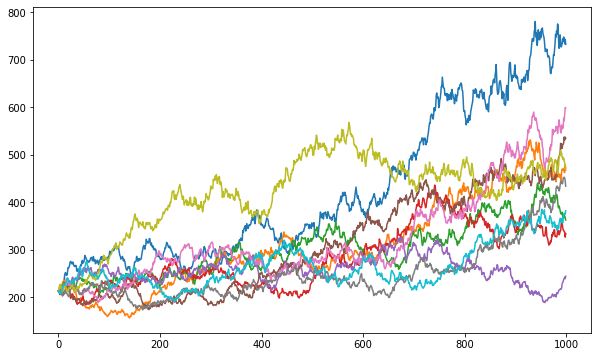

In [84]:
plt.figure(figsize=(10,6))
plt.plot(priceList)
plt.show()